# Population Genetics: Hardy-Weinberg Equilibrium

## Theoretical Foundation

The **Hardy-Weinberg principle** describes the theoretical conditions under which allele and genotype frequencies remain constant in a population across generations. This equilibrium serves as a null model in population genetics, providing a baseline against which evolutionary forces can be measured.

### Mathematical Formulation

Consider a diploid organism with a single locus containing two alleles: $A$ (dominant) and $a$ (recessive). Let:

- $p$ = frequency of allele $A$
- $q$ = frequency of allele $a$

Since these are the only two alleles at this locus:

$$p + q = 1$$

Under Hardy-Weinberg equilibrium, the genotype frequencies after random mating are given by the expansion of $(p + q)^2$:

$$p^2 + 2pq + q^2 = 1$$

Where:
- $p^2$ = frequency of homozygous dominant genotype ($AA$)
- $2pq$ = frequency of heterozygous genotype ($Aa$)
- $q^2$ = frequency of homozygous recessive genotype ($aa$)

### Assumptions of Hardy-Weinberg Equilibrium

The principle holds under the following idealized conditions:

1. **Infinite population size** (no genetic drift)
2. **Random mating** (no sexual selection)
3. **No mutation**
4. **No migration** (closed population)
5. **No natural selection** (all genotypes equally fit)

### Deviation from Equilibrium

The chi-squared statistic quantifies deviation from Hardy-Weinberg expectations:

$$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

Where $O_i$ represents observed counts and $E_i$ represents expected counts under Hardy-Weinberg equilibrium.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Define allele frequency range
p_values = np.linspace(0, 1, 100)
q_values = 1 - p_values

# Calculate Hardy-Weinberg genotype frequencies
freq_AA = p_values**2
freq_Aa = 2 * p_values * q_values
freq_aa = q_values**2

print("Hardy-Weinberg Genotype Frequency Calculations")
print("=" * 50)
print(f"\nFor p = 0.7 (frequency of allele A):")
p_example = 0.7
q_example = 1 - p_example
print(f"  q = {q_example:.2f} (frequency of allele a)")
print(f"  f(AA) = p² = {p_example**2:.4f}")
print(f"  f(Aa) = 2pq = {2*p_example*q_example:.4f}")
print(f"  f(aa) = q² = {q_example**2:.4f}")
print(f"  Sum = {p_example**2 + 2*p_example*q_example + q_example**2:.4f}")

Hardy-Weinberg Genotype Frequency Calculations

For p = 0.7 (frequency of allele A):
  q = 0.30 (frequency of allele a)
  f(AA) = p² = 0.4900
  f(Aa) = 2pq = 0.4200
  f(aa) = q² = 0.0900
  Sum = 1.0000


## Simulation: Testing Hardy-Weinberg Equilibrium

We will simulate a population and test whether observed genotype frequencies conform to Hardy-Weinberg expectations using the chi-squared goodness-of-fit test.

In [2]:
def simulate_population(n_individuals, p_allele):
    """
    Simulate a population under Hardy-Weinberg equilibrium.
    
    Parameters:
    -----------
    n_individuals : int
        Number of individuals in the population
    p_allele : float
        Frequency of the dominant allele A
    
    Returns:
    --------
    genotypes : array
        Array of genotype counts [AA, Aa, aa]
    """
    q_allele = 1 - p_allele
    
    # Expected frequencies under HW equilibrium
    expected_freq = [p_allele**2, 2*p_allele*q_allele, q_allele**2]
    
    # Simulate by drawing from multinomial distribution
    genotypes = np.random.multinomial(n_individuals, expected_freq)
    
    return genotypes

def chi_squared_test(observed, p_allele):
    """
    Perform chi-squared test for Hardy-Weinberg equilibrium.
    
    Parameters:
    -----------
    observed : array
        Observed genotype counts [AA, Aa, aa]
    p_allele : float
        Frequency of the dominant allele A
    
    Returns:
    --------
    chi2 : float
        Chi-squared statistic
    p_value : float
        P-value for the test
    """
    n = sum(observed)
    q_allele = 1 - p_allele
    
    # Expected counts
    expected = np.array([
        n * p_allele**2,
        n * 2 * p_allele * q_allele,
        n * q_allele**2
    ])
    
    # Chi-squared statistic
    chi2 = np.sum((observed - expected)**2 / expected)
    
    # P-value with 1 degree of freedom
    # (3 genotypes - 1 estimated parameter - 1 = 1 df)
    p_value = 1 - stats.chi2.cdf(chi2, df=1)
    
    return chi2, p_value, expected

# Simulate a population
n_individuals = 1000
p_true = 0.6

observed_counts = simulate_population(n_individuals, p_true)

# Estimate allele frequency from observed data
n_AA, n_Aa, n_aa = observed_counts
p_estimated = (2*n_AA + n_Aa) / (2*n_individuals)

print("Population Simulation Results")
print("=" * 50)
print(f"\nPopulation size: {n_individuals}")
print(f"True p (allele A frequency): {p_true}")
print(f"Estimated p from sample: {p_estimated:.4f}")
print(f"\nObserved genotype counts:")
print(f"  AA: {n_AA}")
print(f"  Aa: {n_Aa}")
print(f"  aa: {n_aa}")

# Perform chi-squared test
chi2, p_value, expected = chi_squared_test(observed_counts, p_estimated)

print(f"\nExpected genotype counts (HW equilibrium):")
print(f"  AA: {expected[0]:.2f}")
print(f"  Aa: {expected[1]:.2f}")
print(f"  aa: {expected[2]:.2f}")
print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nConclusion: {'Consistent with HW equilibrium' if p_value > 0.05 else 'Significant deviation from HW equilibrium'}")

Population Simulation Results

Population size: 1000
True p (allele A frequency): 0.6
Estimated p from sample: 0.5915

Observed genotype counts:
  AA: 348
  Aa: 487
  aa: 165

Expected genotype counts (HW equilibrium):
  AA: 349.87
  Aa: 483.26
  aa: 166.87

Chi-squared statistic: 0.0600
P-value: 0.8064

Conclusion: Consistent with HW equilibrium


## Multi-Generation Simulation

We now simulate the evolution of allele frequencies across multiple generations to demonstrate:
1. Stability under Hardy-Weinberg conditions
2. Effects of genetic drift in finite populations

In [3]:
def simulate_generations(n_individuals, p_initial, n_generations, with_drift=True):
    """
    Simulate allele frequency changes across generations.
    
    Parameters:
    -----------
    n_individuals : int
        Population size
    p_initial : float
        Initial frequency of allele A
    n_generations : int
        Number of generations to simulate
    with_drift : bool
        If True, simulate finite population (drift); if False, deterministic
    
    Returns:
    --------
    p_history : array
        Allele frequency at each generation
    genotype_history : array
        Genotype frequencies at each generation (n_gen x 3)
    """
    p_history = np.zeros(n_generations)
    genotype_history = np.zeros((n_generations, 3))
    
    p_current = p_initial
    
    for gen in range(n_generations):
        q_current = 1 - p_current
        
        # Hardy-Weinberg genotype frequencies
        hw_freq = [p_current**2, 2*p_current*q_current, q_current**2]
        
        if with_drift:
            # Sample genotypes (genetic drift)
            genotype_counts = np.random.multinomial(n_individuals, hw_freq)
            # Calculate new allele frequency
            p_current = (2*genotype_counts[0] + genotype_counts[1]) / (2*n_individuals)
            genotype_history[gen] = genotype_counts / n_individuals
        else:
            # Deterministic (infinite population)
            genotype_history[gen] = hw_freq
        
        p_history[gen] = p_current
        
        # Handle fixation
        if p_current == 0 or p_current == 1:
            p_history[gen:] = p_current
            if p_current == 1:
                genotype_history[gen:] = [1, 0, 0]
            else:
                genotype_history[gen:] = [0, 0, 1]
            break
    
    return p_history, genotype_history

# Simulation parameters
n_generations = 100
p_initial = 0.5

# Small population (strong drift)
np.random.seed(123)
p_small, geno_small = simulate_generations(50, p_initial, n_generations, with_drift=True)

# Medium population (moderate drift)
np.random.seed(456)
p_medium, geno_medium = simulate_generations(500, p_initial, n_generations, with_drift=True)

# Large population (weak drift)
np.random.seed(789)
p_large, geno_large = simulate_generations(5000, p_initial, n_generations, with_drift=True)

print("Multi-Generation Simulation")
print("=" * 50)
print(f"Initial allele frequency: {p_initial}")
print(f"Generations simulated: {n_generations}")
print(f"\nFinal allele frequencies:")
print(f"  N=50 (small):   p = {p_small[-1]:.4f}")
print(f"  N=500 (medium): p = {p_medium[-1]:.4f}")
print(f"  N=5000 (large): p = {p_large[-1]:.4f}")

Multi-Generation Simulation
Initial allele frequency: 0.5
Generations simulated: 100

Final allele frequencies:
  N=50 (small):   p = 0.9900
  N=500 (medium): p = 0.5560
  N=5000 (large): p = 0.4920


## Visualization

We create a comprehensive visualization showing:
1. The de Finetti diagram (ternary plot of genotype space)
2. Allele frequency dynamics across generations
3. Hardy-Weinberg parabola demonstrating the relationship between allele and genotype frequencies

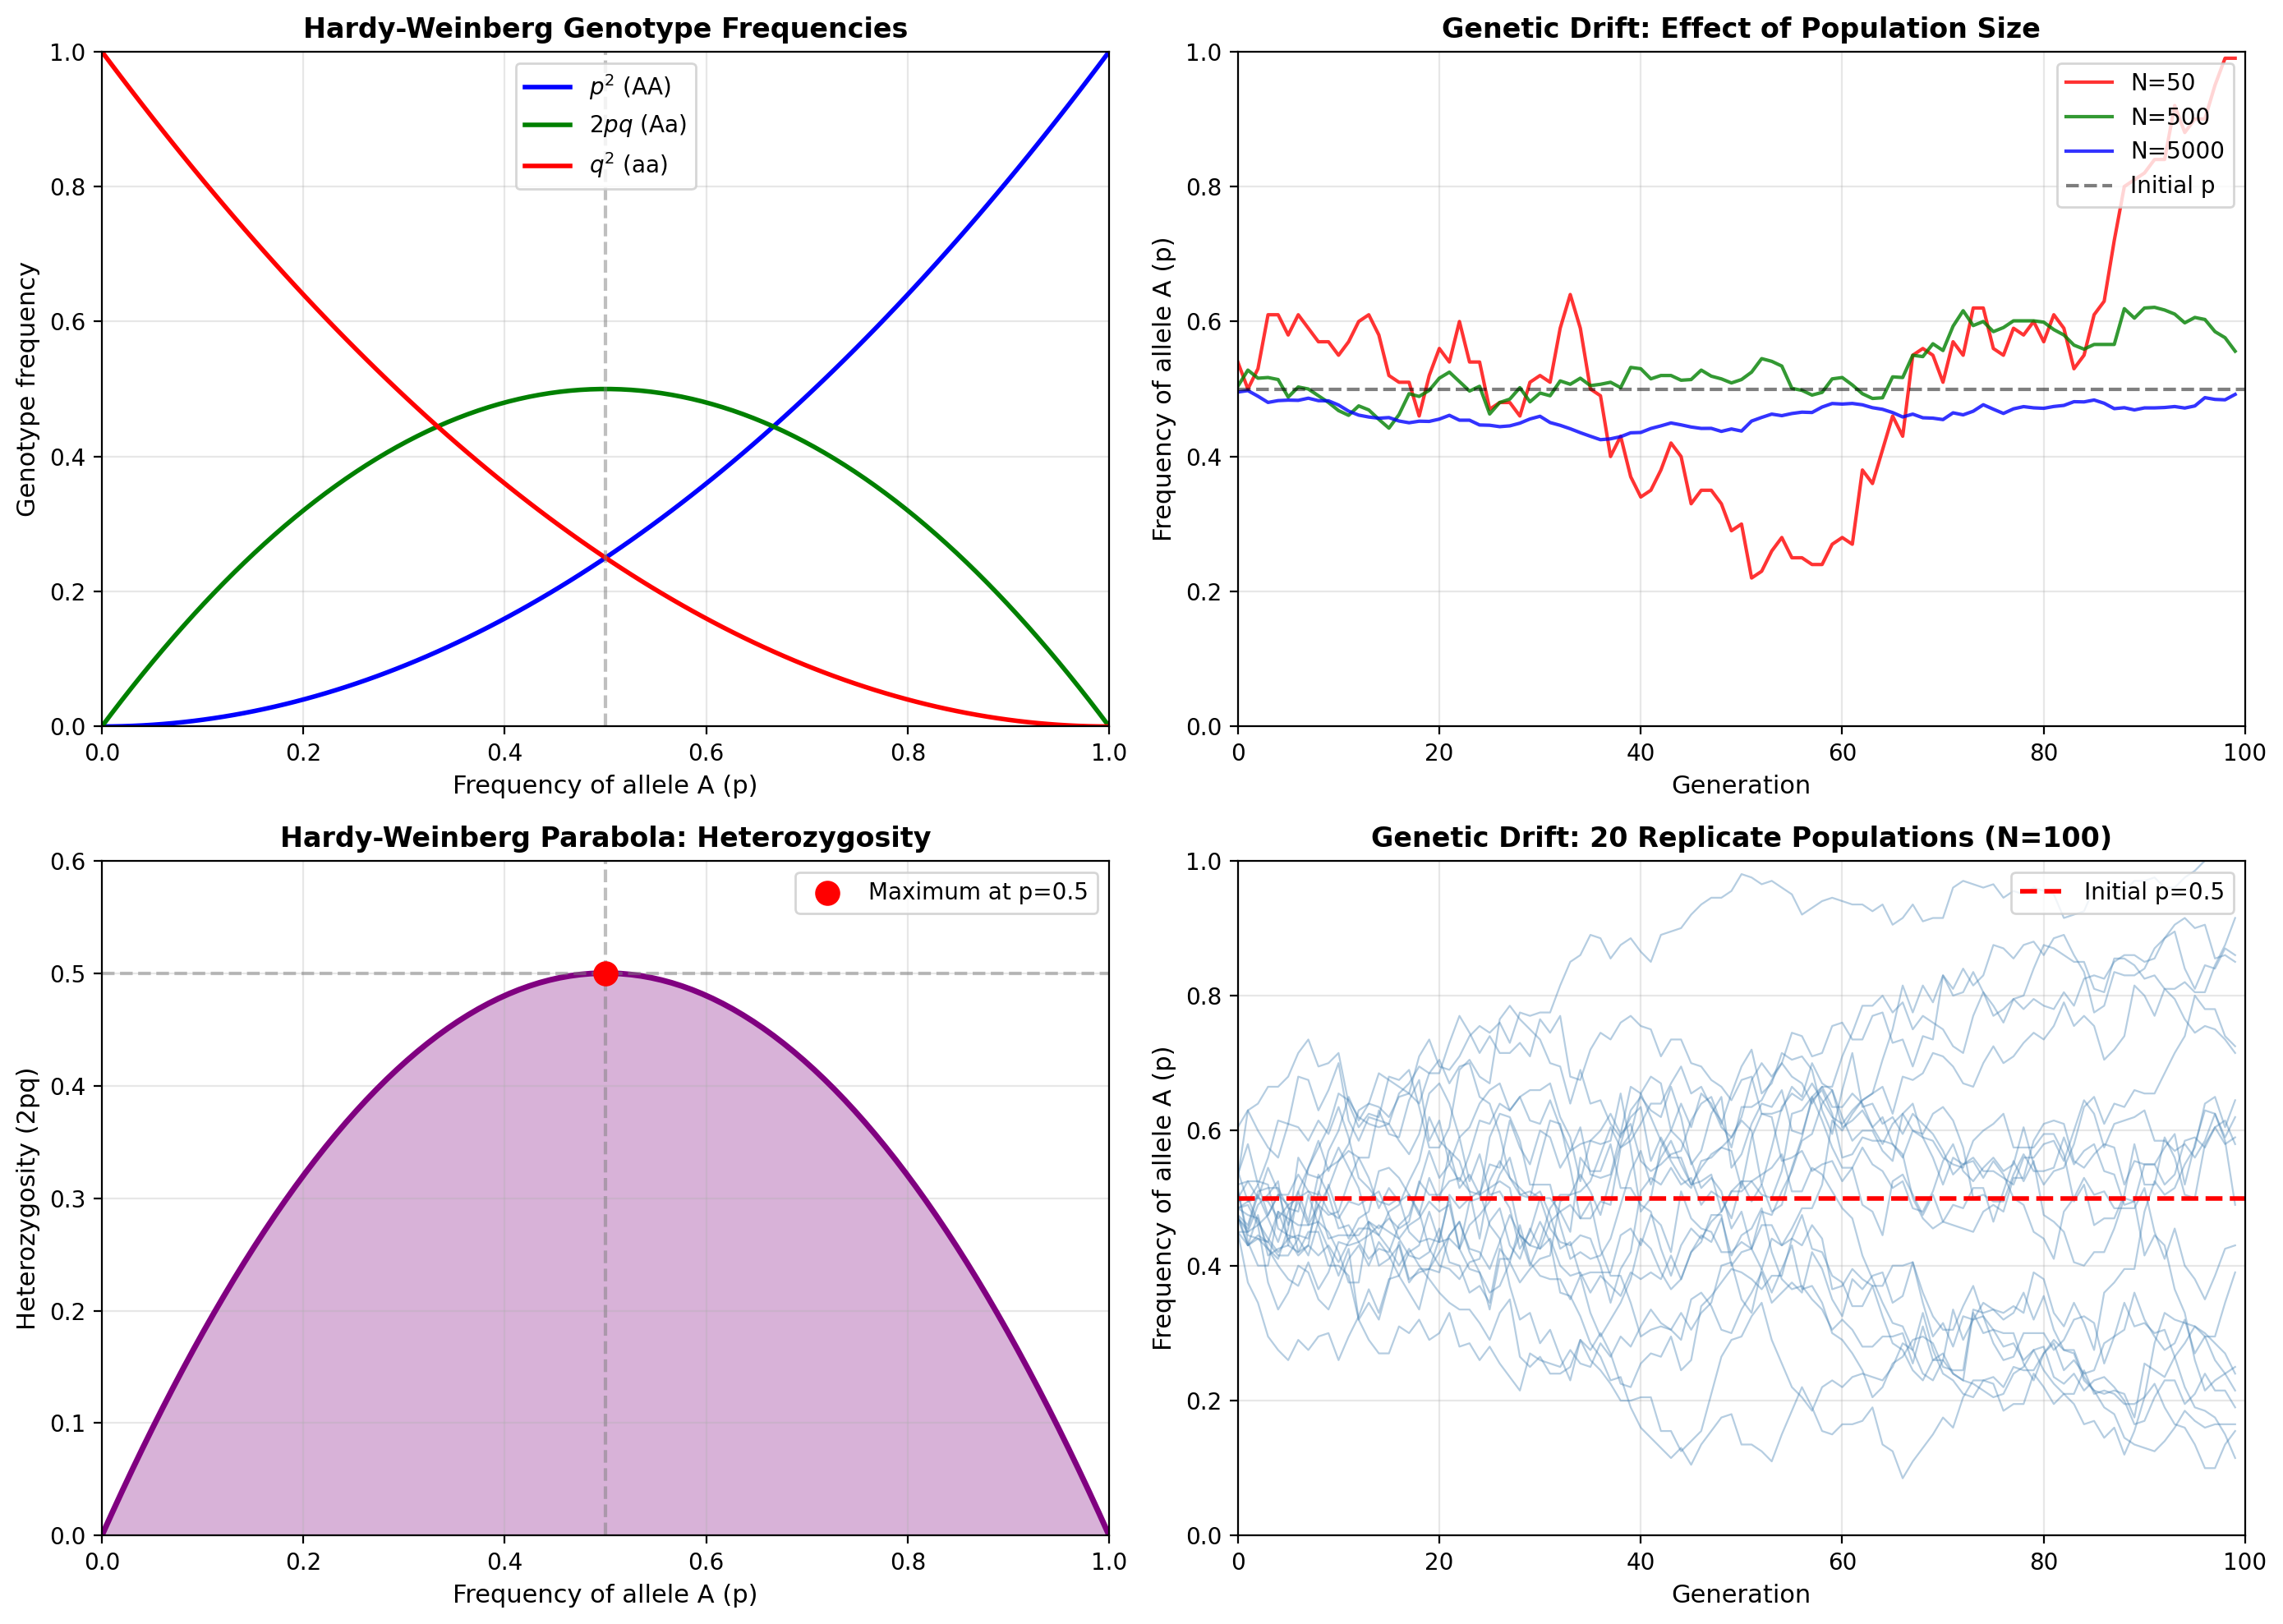


Figure saved to 'plot.png'


In [4]:
# Create comprehensive figure
fig = plt.figure(figsize=(14, 10))

# Plot 1: Hardy-Weinberg Genotype Frequencies vs Allele Frequency
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(p_values, freq_AA, 'b-', linewidth=2, label=r'$p^2$ (AA)')
ax1.plot(p_values, freq_Aa, 'g-', linewidth=2, label=r'$2pq$ (Aa)')
ax1.plot(p_values, freq_aa, 'r-', linewidth=2, label=r'$q^2$ (aa)')
ax1.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Frequency of allele A (p)', fontsize=11)
ax1.set_ylabel('Genotype frequency', fontsize=11)
ax1.set_title('Hardy-Weinberg Genotype Frequencies', fontsize=12, fontweight='bold')
ax1.legend(loc='upper center', fontsize=10)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3)

# Plot 2: Genetic Drift - Allele Frequency Over Time
ax2 = fig.add_subplot(2, 2, 2)
generations = np.arange(n_generations)
ax2.plot(generations, p_small, 'r-', linewidth=1.5, label='N=50', alpha=0.8)
ax2.plot(generations, p_medium, 'g-', linewidth=1.5, label='N=500', alpha=0.8)
ax2.plot(generations, p_large, 'b-', linewidth=1.5, label='N=5000', alpha=0.8)
ax2.axhline(y=p_initial, color='black', linestyle='--', alpha=0.5, label='Initial p')
ax2.set_xlabel('Generation', fontsize=11)
ax2.set_ylabel('Frequency of allele A (p)', fontsize=11)
ax2.set_title('Genetic Drift: Effect of Population Size', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.set_xlim(0, n_generations)
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)

# Plot 3: Heterozygosity (2pq) as function of p - the Hardy-Weinberg parabola
ax3 = fig.add_subplot(2, 2, 3)
heterozygosity = 2 * p_values * (1 - p_values)
ax3.plot(p_values, heterozygosity, 'purple', linewidth=2.5)
ax3.fill_between(p_values, heterozygosity, alpha=0.3, color='purple')
ax3.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
ax3.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax3.scatter([0.5], [0.5], color='red', s=100, zorder=5, label='Maximum at p=0.5')
ax3.set_xlabel('Frequency of allele A (p)', fontsize=11)
ax3.set_ylabel('Heterozygosity (2pq)', fontsize=11)
ax3.set_title('Hardy-Weinberg Parabola: Heterozygosity', fontsize=12, fontweight='bold')
ax3.legend(loc='upper right', fontsize=10)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 0.6)
ax3.grid(True, alpha=0.3)

# Plot 4: Multiple replicates showing drift variance
ax4 = fig.add_subplot(2, 2, 4)
n_replicates = 20
n_pop = 100

for i in range(n_replicates):
    p_rep, _ = simulate_generations(n_pop, p_initial, n_generations, with_drift=True)
    ax4.plot(generations, p_rep, alpha=0.4, linewidth=0.8, color='steelblue')

ax4.axhline(y=p_initial, color='red', linestyle='--', linewidth=2, label=f'Initial p={p_initial}')
ax4.set_xlabel('Generation', fontsize=11)
ax4.set_ylabel('Frequency of allele A (p)', fontsize=11)
ax4.set_title(f'Genetic Drift: {n_replicates} Replicate Populations (N={n_pop})', fontsize=12, fontweight='bold')
ax4.legend(loc='upper right', fontsize=10)
ax4.set_xlim(0, n_generations)
ax4.set_ylim(0, 1)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('population_genetics_hardy_weinberg_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Summary

This notebook demonstrated:

1. **Hardy-Weinberg Principle**: The mathematical relationship $p^2 + 2pq + q^2 = 1$ describes genotype frequencies under equilibrium conditions.

2. **Statistical Testing**: The chi-squared goodness-of-fit test quantifies deviation from Hardy-Weinberg expectations.

3. **Genetic Drift**: In finite populations, allele frequencies fluctuate randomly, with smaller populations experiencing greater variance.

4. **Heterozygosity Maximum**: The heterozygote frequency $2pq$ reaches its maximum value of 0.5 when $p = q = 0.5$.

The Hardy-Weinberg principle provides a crucial null model in population genetics, allowing researchers to identify when evolutionary forces—selection, drift, mutation, migration, or non-random mating—are acting on a population.